# Encoding Classical Information

Irrespective of the choice of a quantum computing paradigm, you will always face the problem-- how do I encode the classical information I have in the quantum system to perform some quantum protocol? So there are a couple of ways of doing it, and here's an overview of all of them. The easiest thing to do is to do something called basis encoding. 

In this case, you don't do anything different from what you do on a digital computer. So say you have the number three that you would like to encode. Then you would write it as binary. So this would be the representation of digital computing where this is bit zero and this is bit one. And then you just take this, and you write it as a quantum state. 

$$x=3\Rightarrow11\Rightarrow\mid11\rangle$$

You will use two qubits, and you would flip both of them to one. And it would describe the number three. And if you have a vector, say, of these two elements, you can create a binary vector of that. And then you can concatenate the two strings into a single ket, into a four qubit state in this case. 

$$x=\left[\begin{array}{c}
3\\
2
\end{array}\right]\Rightarrow\mid1110\rangle$$

The greatest advantage of this encoding is that it's very easy to prepare because you only have to flip certain qubits. Most random computers start from being initialized in the zero state. And then you just have to make these not operation, the x operations, to get to the state that you want to express. But the great disadvantage is that it's very wasteful of your qubits. You need lots and lots of qubits to describe, say, floating point numbers. Another way of doing it is amplitude encoding. 

$$x=\left[\begin{array}{c}
x_{0}\\
x_{1}
\end{array}\right]$$

$$\parallel x\parallel_{2}=1$$

Imagine that you have a vector. And let's have this assumption that your vector is already normalized. Its length is one. Then what you can do is just write down the same thing with the original coefficients, indexing the individual coefficients of probability amplitudes with the basis vector. 

$$\mid x\rangle=x_{0}\mid0\rangle+x_{1}\mid1\rangle$$

The advantage of this is that it requires a lot fewer qubits. And in principle, at least in theory, this is of infinite precision. So if you have a real number here, you would have a real number here. But the disadvantage is that it's unclear exactly how you would prepare this state and how you would read out the actual values here. So you would have to dream up some state preparation protocol, and then you would have to perform tomography to understand what these probability aptitudes are at the end of your calculation. Then they can also encode the problem in a Hamiltonian. So when you think about it, there are actually two ways of doing this. One is that we have seen over and over again this is the ising way. 

$$H=-\sum_{<i,j>}J_{ij}\sigma_{i}\sigma_{j}+\sum_{i}h_{i}\sigma_{i}$$

You have a problem. You method to the ising model, or our quadratic unconstrained binary optimization problem is given in this form. And that's what you saw, for instance, by quantum annealing. So the encoding comes in in these couplings, in these biased terms J_{ij}, h_{i}. These are the ones expressing your problem. Whereas here \mid1110\rangle, it was the state. And here $x_{0}$, $x_{1}$, it will have all the probability amplitudes. So the advantage of this is that it's fairly easy to implant. We know we are up to thousands of qubits in a physical system implementing this model. But the disadvantage is that it has a very limited scope in what you can do. You can solve either optimization of sampling problems with this paradigm. Then the second way of doing Hamiltonian encoding is by doing Hamiltonian simulation. 

$$U=e^{-iHt}$$

Now this simulation is a bit misleading because this is not a simulation on the classical digital computer. This is a quantum computer simulating a quantum system. So what you are doing is actually you're trying to implement this unitary on a quantum computer. And an example of this is exactly what the QAOA optimization algorithm does when it approximates the adiabatic pathway. And a very, very important subroutine in many idealized quantum machine learning algorithms is quantum matrix inversion. And it does the exact same thing. It encodes the matrix to be encoded here in the Hamiltonian. So the advantage of this is exactly this. It's very natural to encode the matrix in this formalism. The disadvantage is that there are countless terms and conditions that apply. So we only see quantum matrix inversion in the part that we talk about coherent quantum protocols and large scale quantum computers. And its very, very limited what we can do on actual quantum computers today when we want to use this representation. 

Check

• Why can't we encode everything in bit strings as in digital computing?

– This would be inefficient.

– Some optimization problems naturally map to the Ising model.

– The probability amplitudes naturally encode real and complex numbers.

• Mapping to the Ising model is both Hamiltonian and basis encoding, since the spin variables have to express a part of your problem.

– True

• Hamiltonian simulation is efficient for any Hamiltonian. 

– False

#F

Any learning algorithm will always have strengths and weaknesses: a single model is unlikely to fit every possible scenario. Ensembles combine multiple models to achieve higher generalization performance than any of the constituent models is capable of. How do we assemble the weak learners? We can use some sequential heuristics. For instance, given the current collection of models, we can add one more based on where that particular model performs well. Alternatively, we can look at all the correlations of the predictions between all models, and optimize for the most uncorrelated predictors. Since this latter is a global approach, it naturally maps to a quantum computer. But first, let's take a look a closer look at loss functions and regularization, two key concepts in machine learning.

# Loss Functions and Regularization

If you can solve a problem by a classical computer -- let that be a laptop or a massive GPU cluster -- there is little value in solving it by a quantum computer that costs ten million dollars. The interesting question in quantum machine learning is whether there are problems in machine learning and AI that fit quantum computers naturally, but are challenging on classical hardware. This, however, requires a good understanding of both machine learning and contemporary quantum computers.

In this course, we primarily focus on the second aspect, since there is no shortage of educational material on classical machine learning. However, it is worth spending a few minutes on going through some basics.

Let us take a look at the easiest possible problem: the data points split into two, easily distinguishable sets. We randomly generate this data set:

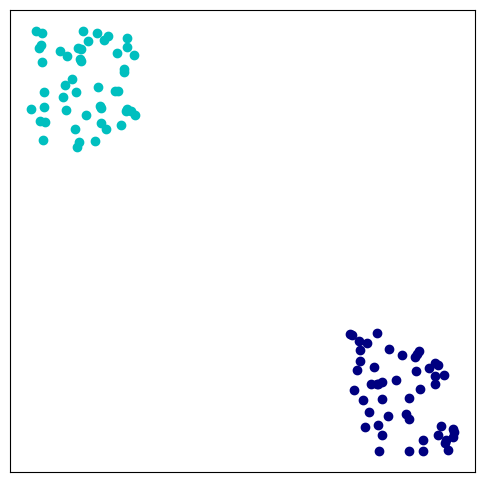

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

c1 = np.random.rand(50, 2)/5
c2 = (-0.6, 0.5) + np.random.rand(50, 2)/5
data = np.concatenate((c1, c2))
labels = np.array([0] * 50 + [1] *50)
plt.figure(figsize=(6, 6))
plt.subplot(111, xticks=[], yticks=[])
plt.scatter(data[:50, 0], data[:50, 1], color='navy')
plt.scatter(data[50:, 0], data[50:, 1], color='c')

Let's shuffle the data set into a training set that we are going to optimize over (2/3 of the data), and a test set where we estimate our generalization performance. 

In [2]:
idx = np.arange(len(labels))
np.random.shuffle(idx)
# train on a random 2/3 and test on the remaining 1/3
idx_train = idx[:2*len(idx)//3]
idx_test = idx[2*len(idx)//3:]
X_train = data[idx_train]
X_test = data[idx_test]
y_train = labels[idx_train]
y_test = labels[idx_test]

We will use the package `scikit-learn` to train various machine learning models.

In [3]:
import sklearn
import sklearn.metrics
metric = sklearn.metrics.accuracy_score

ModuleNotFoundError: No module named 'sklearn'

Let's train a perceptron, which has a linear loss function $\frac{1}{N}\sum_{i=1}^N |h(x_i)-y_i)|$:

In [4]:
from sklearn.linear_model import Perceptron
model_1 = Perceptron(max_iter=1000, tol=1e-3)
model_1.fit(X_train, y_train)
print('accuracy (train): %5.2f'%(metric(y_train, model_1.predict(X_train))))
print('accuracy (test): %5.2f'%(metric(y_test, model_1.predict(X_test))))

accuracy (train):  1.00
accuracy (test):  1.00


It does a great job. It is a linear model, meaning its decision surface is a plane. Our dataset is separable by a plane, so let's try another linear model, but this time a support vector machine. If you eyeball our dataset, you will see that to define the separation between the two classes, actually only a few points close to the margin are relevant. These are called support vectors and support vector machines aim to find them. Its objective function measures the loss and it has a regularization term with a weight $C$. The $C$ hyperparameter controls a regularization term that penalizes the objective for the number of support vectors:

In [5]:
from sklearn.svm import SVC
model_2 = SVC(kernel='linear', C=10)
model_2.fit(X_train, y_train)
print('accuracy (train): %5.2f'%(metric(y_train, model_2.predict(X_train))))
print('accuracy (test): %5.2f'%(metric(y_test, model_2.predict(X_test))))
print('Number of support vectors:', sum(model_2.n_support_))

accuracy (train):  1.00
accuracy (test):  1.00
Number of support vectors: 2


It picks only two datapoints out of the hundred. Let's change the hyperparameter to reduce the penalty:

In [6]:
model_2 = SVC(kernel='linear', C=0.01)
model_2.fit(X_train, y_train)
print('accuracy (train): %5.2f'%(metric(y_train, model_2.predict(X_train))))
print('accuracy (test): %5.2f'%(metric(y_test, model_2.predict(X_test))))
print('Number of support vectors:', sum(model_2.n_support_))

accuracy (train):  0.52
accuracy (test):  0.47
Number of support vectors: 64


You can see that the model gets confused by using too many datapoints in the final classifier. This is one example where regularization helps.

# Ensemble Learning

So far we have gone through how to encode classical information in quantum computers. And we are getting ready to start talking about how you do learning on the encoded information in a quantum computer. But first, let's talk about a couple of things in machine learning. So when we talk about optimization in machine learning, we typically don't talk about the kind of optimization that you would perform on a quantum computer. So in a typical scenario, you're given a sample. 

$$S=\{(x_{i},y_{i})\}_{i=1}^{N}\qquad x\in\mathbb{R}^{d}$$

You're given a couple of data points in some high dimensional space each coming with some label. Labels can be 0 or 1 or belonging to some finite many classes. So what you're actually learning in the machine learning model that you're trying to fit to the data is conditional probability distribution. 

$$\underbrace{h(\theta,x)}:\mathbb{R}^{d}\rightarrow\{0,1\}$$

$$P(y\mid x):\mathbb{R}^{d}\rightarrow\{0,c-1\}$$

So you're trying to approximate that, you know, once you see a data instance of a certain form, what is the label that you should predict? So this type of learning is discriminative and supervised, and this is exactly where methods like deep learning excel. 

$$\underset{\theta}{min}L(g,S)$$

And what you do is you define a loss function in the parameters that you're trying to optimize for the particular machine learning model. And it's also a function of the actual sample that you are given. And then you look at these parameters, these theta parameters. They're sitting in some high dimensional space themselves.

$$\theta\in\mathbb{R}^{d}$$

And each one of the entries of these theta vector is actually a 32 or a 64-bit precision floating point number. That's how it is represented on a computer, a digital computer. And when we talk about things like deep learning, then this perimeter space is extremely high dimensional. We are talking about millions of weights. So you use at least 32 bits per rate, and you have millions of them, whereas the largest quantum computer we have has 2,000 qubits. So there seems to be a misfit between this continuous type of optimization and what we can do on a quantum computer. So we have to think a little bit differently. There is hope you can use quantum computers for optimization but not for these kind of problems. So let's take a look at ensembles. 

$$h_{1}(\theta_{1};x),\ldots,h_{k}(\theta_{k};x)$$

$$F_{k}(w,x)=\sum_{k=1}^{K}w_{k}h_{k}(\theta_{k},x)$$

So in ensembles, for instance, you can take a couple of large neural networks $h_{1}(\theta_{1};x),\ldots,h_{k}(\theta_{k};x)$. And what you want to do is you want to combine them into a single strong predictor $\sum_{k=1}^{K}w_{k}h_{k}(g_{k},x)$. So for instance, each of these neural networks gets a couple of instances wrong, and there will be other neural networks who would compensate for that mistake. And how you combine them is a big open question. So you want to weight each and every one of the neural networks so their overall prediction is actually stronger. And when you look at this, this starts to get a discrete flavor because now you have discrete many neural networks. And while this combination of weights is real valued or continuous valued, what actually matters is the relative importance of each of these neural networks so there is a way to discretize it better. So this idea of ensembles have been around for at least 20 years, slightly more, and they are still very important. Like, many of the Kaggle competitions are won by ensembles of neural networks. And one of the first algorithms that made this idea extremely useful was AdaBoost. So what it does, it keeps expanding this ensemble sequentially. So it adds a new learning model to the ensemble one by one.

$$F_{m}(w,x)=F_{m-1}(w,x)+w_{m}h_{m}(g_{m},x)$$

So if you have less than the available models, then what you do is you take the previous ensemble $F_{m-1}(w,x)$ that you ensembled so far. And you add the new model $w_{m}h_{m}(g_{m},x)$ with some corresponding weight. And the way you calculate the weight of this new model is by looking at the exponential loss, you factorize this exponential loss into two parts-- the loss coming from the previous ensemble and the loss coming from the new addition.

$$\sum_{i=i}^{N}e^{-y:F_{m}(x_{i})}$$

And it's a good model then if you have a higher weight. And if it's not so good model if you receive a lower rate. 

Regularization is absent, which means that if you use up all of your K available models. So even, if something is very bad, it will still be in the ensemble. And if its predictor is strongly correlated with one of the other predictors, it's still going to be there even though it doesn't really contribute anything new. Nevertheless, there's all sorts of modern variants which address, for instance, this problem. One is called xg boost, and the other is called gradient boosted trees. These are very important algorithms. Even in today's machine learning, these are actively used. And it's worth looking at boosting methods and ensemble learning and see how quantum computers can help. 

Check

• A supervised discriminative learning algorithm...

– Trains on a training set with labels: $\{(x_{i},y_{i})\}_{i=1}^{N}$

– Approximates a conditional probability distribution $P(y\mid x)$.

• You are training a linear classifier $$h(\theta,x)=\theta_{0}+\theta_{1}x_{1}+\ldots\theta_{d}x_{d}$$ on a sample $$S=\{(x_{i},y_{i})\}_{i=1}^{N}$$ where $\theta\in\mathbb{R}^{d+1}$ and . You threshold the model y to get a class for some input x . What's the most straightforward way to train this model?

– Define a differentiable loss function and do a gradient descent.

• Why do we expect an ensemble to work better than a single predictor?

– The ensemble is easier to train.


# Ensemble methods

Ensembles yield better results when there is considerable diversity among the base classifiers. If diversity is sufficient, base classifiers make different errors, and a strategic combination may reduce the total error, ideally improving generalization performance. A constituent model in an ensemble is also called a base classifier or weak learner, and the composite model a strong learner.

The generic procedure of ensemble methods has two steps. First, develop a set of base classifiers from the training data. Second, combine them to form the ensemble. In the simplest combination, the base learners vote, and the label prediction is based on majority. More involved methods weigh the votes of the base learners. 

Let us import some packages and define our figure of merit as accuracy in a balanced dataset.

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.metrics
%matplotlib inline

metric = sklearn.metrics.accuracy_score

We generate a random dataset of two classes that form concentric circles:

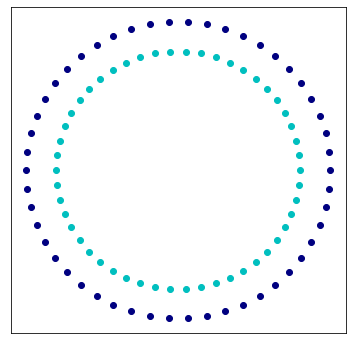

In [8]:
np.random.seed(0)
data, labels = sklearn.datasets.make_circles()
idx = np.arange(len(labels))
np.random.shuffle(idx)
# train on a random 2/3 and test on the remaining 1/3
idx_train = idx[:2*len(idx)//3]
idx_test = idx[2*len(idx)//3:]
X_train = data[idx_train]
X_test = data[idx_test]

y_train = 2 * labels[idx_train] - 1  # binary -> spin
y_test = 2 * labels[idx_test] - 1

scaler = sklearn.preprocessing.StandardScaler()
normalizer = sklearn.preprocessing.Normalizer()

X_train = scaler.fit_transform(X_train)
X_train = normalizer.fit_transform(X_train)

X_test = scaler.fit_transform(X_test)
X_test = normalizer.fit_transform(X_test)
plt.figure(figsize=(6, 6))
plt.subplot(111, xticks=[], yticks=[])
plt.scatter(data[labels == 0, 0], data[labels == 0, 1], color='navy')
plt.scatter(data[labels == 1, 0], data[labels == 1, 1], color='c')

Let's train a perceptron:

In [9]:
from sklearn.linear_model import Perceptron
model_1 = Perceptron(max_iter=1000, tol=1e-3)
model_1.fit(X_train, y_train)
print('accuracy (train): %5.2f'%(metric(y_train, model_1.predict(X_train))))
print('accuracy (test): %5.2f'%(metric(y_test, model_1.predict(X_test))))

accuracy (train):  0.44
accuracy (test):  0.65


Since its decision surface is linear, we get a poor accuracy. Would a support vector machine with a nonlinear kernel fare better?

In [10]:
from sklearn.svm import SVC
model_2 = SVC(kernel='rbf', gamma='auto')
model_2.fit(X_train, y_train)
print('accuracy (train): %5.2f'%(metric(y_train, model_2.predict(X_train))))
print('accuracy (test): %5.2f'%(metric(y_test, model_2.predict(X_test))))

accuracy (train):  0.64
accuracy (test):  0.24


It performs better on the training set, but at the cost of extremely poor generalization. 

Boosting is an ensemble method that explicitly seeks models that complement one another. The variation between boosting algorithms is how they combine weak learners. Adaptive boosting (AdaBoost) is a popular method that combines the weak learners in a sequential manner based on their individual accuracies. It has a convex objective function that does not penalize for complexity: it is likely to include all available weak learners in the final ensemble. Let's train AdaBoost with a few weak learners:

In [11]:
from sklearn.ensemble import AdaBoostClassifier
model_3 = AdaBoostClassifier(n_estimators=3)
model_3.fit(X_train, y_train)
print('accuracy (train): %5.2f'%(metric(y_train, model_3.predict(X_train))))
print('accuracy (test): %5.2f'%(metric(y_test, model_3.predict(X_test))))

accuracy (train):  0.65
accuracy (test):  0.29


Its performance is marginally better than that of the SVM.

# Qboost
Let's continue our exploration of ensemble methods. But this time around, let's take a look at what we can do with a quantum computer. So when we talked about AdaBoost, we mentioned that we used an exponential loss, and there was no regularization term. So let's take a look at how we can come up with a different objective function that would map better to a quantum computer and that would give some kind of an advantage over the classical method. So we are given a sample of data points. 

$$S=\{(x_{i},y_{i})\}_{i=1}^{N}$$

And data points, the points themselves lie in some high dimensional space, and they come with binary labels in this case. And then we are also given a couple of models $\{h_{k}(x)\}_{k=1}^{K}$ which were already learned. So you can think about it, for instance, as large neural networks. And we have capital $K$ of them. 

$$\underset{w}{min}\left[\frac{1}{N}\sum_{i=1}^{N}\left(\sum_{k=1}^{K}\boldsymbol{w}_{z}h_{z}(x_{i})-y_{i}\right)^{z}+\lambda\parallel W\parallel_{0}\right]$$

$$\parallel W\parallel\in\mathbb{R}^{K}\qquad\text{not discrete}$$

$$\parallel W\parallel_{0}=\sqrt{\sum W_{i}^{0}}$$

So now what we do is we measure the square loss between the prediction of the ensemble, which combines the individual models, and the actual label yi. So this contrasts with the exponential loss that we talked about in AdaBoost. So that's the actual loss part. And we have a second part here which does a regularization $\lambda\parallel W\parallel_{0}$. 

So we take the zero norm of the W weight vector. So the zero norm just measures how many elements are non-zero. So what it does is if we increase the value of this hyperparameter $\lambda$, then it becomes extremely important. You had to have most of the W entries zero. On the other end, if you decrease lambda, then there's a lower penalty for including more and more elements in this ensemble. So zero means that the model is not included and the non-zero value means that the particular model will be part of the ensemble. So this way, we can find a trade-off between having a simple model and having some additions to the ensemble that may or may not improve our overall prediction. So in principle, these W weights are not discrete. So we still talk about real values. But what really matters is the relative importance and whether they are included. So we can reduce the bit width. So we can use just, say, three widths to represent a weight. And now we have a discrete problem. Now we have to transform it a little bit and use our Hamiltonian encoding, namely that-- and one of the two kinds of Hamiltonian encodings, the Ising encoding. 

$$\underset{w}{min}\left[\frac{1}{N}\sum_{i=1}^{N}\left(\sum_{k=1}^{K}\boldsymbol{w}_{z}h_{z}(x_{i})\right)^{z}-2\sum_{k=1}^{K}\boldsymbol{w}_{z}h_{z}(x_{i})y_{i}+y_{i}^{2}\boldsymbol{w}_{z}h_{z}(x_{i})+\lambda\parallel W\parallel_{0}\right]$$

$$=\underset{w}{min}\left[\frac{1}{N}\sum_{i=1}^{N}\boldsymbol{w}_{k}\boldsymbol{w}_{l}\left(\sum_{i=1}^{N}h_{z}(x_{i})h_{l}(x_{i})\right)-\frac{2}{N}\sum_{k=1}^{K}\boldsymbol{w}_{k}\sum h_{k}(x_{i})y_{i}+\lambda\parallel W\parallel_{0}\right]$$

And then we can solve it with a quantum annealer or by using QAOA. So here, I'm just rewriting this expression in a different way. So what I do is I expand this square loss $$\left(\sum_{k=1}^{K}\boldsymbol{w}_{z}h_{z}(x_{i})-y_{i}\right)^{z}$$. 
So now I have this quadratic term $$\left(\sum_{k=1}^{K}\boldsymbol{w}_{z}h_{z}(x_{i})\right)^{z}$$ over the sum of the ensemble. Then I have this term $$2\sum_{k=1}^{K}\boldsymbol{w}_{z}h_{z}(x_{i})y_{i}$$, which measures the correlation between the output of a predictor and the actual label. We have this term $y_{i}^{2}$, which is just the label squared. We can get rid of it because there's no parameter in it. So it's not going to affect our minimization. And finally, we retain the regularization term as it was $\lambda\parallel W\parallel_{0}$. So we can continue working on this equation, and we can rearrange certain terms and move the sums around. So if I write it this way, the first term, then what I get is I end up with this term $$\left(\sum_{i=1}^{N}h_{z}(x_{i})h_{l}(x_{i})\right)$$ which measures the correlation between the individual models. And here $\boldsymbol{w}_{l}$ you have the corresponding weights between the different models. Then-- this should be wl here. So it's a multiplication of two weight vectors-- sorry, two entries in the weight vector. Then you have this term $$\frac{2}{N}\sum_{k=1}^{K}\boldsymbol{w}_{k}\sum h_{k}(x_{i})y_{i}+\lambda\parallel W\parallel_{0}$$ where you measure the same thing as before $h_{k}(x_{i})y_{i}$. So this is the same kind of correlation between the label and the actual model weighted by the actual weight in the weight vector plus this regularization term $\lambda\parallel W\parallel_{0}$. So in the regularization term you can get rid of this square root 0 $\sqrt{\sum W_{i}^{0}}$. It doesn't make any difference. So now if you look at this part $$\sum_{k=1}^{K}\boldsymbol{w}_{k}\sum h_{k}(x_{i})y_{i}+\lambda\parallel W\parallel_{0}$$, what you see here is that you have elements of the W vector weighted by some numbers $h_{k}(x_{i})y_{i}$. So this is the bias term in the Hamiltonian encoding in the Ising model $\sum_{i}h_{i}\sigma_{i}$. So this would correspond to the external magnetic field in the Ising model. Well, the only difference is that the WK entries are described as bit strings whereas here, we have spins, which take values plus or minus. But that's just the shift. That's very easy to transform. And then this term here has this interaction, this quadratic interaction, between these discrete variables. So this maps to the $\sigma_I$, $\sigma_J$ interaction with certain couplings. So here you have your Ising model. That's all you have to do. And now you can solve this ensemble problem on a quantum computer.

Rewind this video!!!

Check:

• Why do we consider $l_{0}$-regularization?

– It is a stronger constraint on sparsity than $l_{1}$ or $l_{2}$ normalization.

• We use a low bit width representation of the weights because...

– Current quantum computers have few qubits.

# More QBoost

The idea of Qboost is that optimization on a quantum computer is not constrained to convex objective functions, therefore we can add arbitrary penalty terms and rephrase our objective [[1](#1)]. Qboost solves the following problem:

$$
\mathrm{argmin}_{w} \left(\frac{1}{N}\sum_{i=1}^{N}\left(\sum_{k=1}^{K}w_kh_k(x_i)-
y_i\right)^2+\lambda\|w\|_0\right),
$$

where $h_k(x_i)$ is the prediction of the weak learner $k$ for a training instance $k$. The weights in this formulation are binary, so this objective function already maps to an Ising model. The regularization in the $l_0$ norm ensures sparsity, and it is not the kind of regularization we would consider classically: it is hard to optimize with this term on a digital computer.

Let us expand the quadratic part of the objective:

$$
\mathrm{argmin}_{w} \left(\frac{1}{N}\sum_{i=1}^{N}
\left( \left(\sum_{k=1}^{K} w_k h_k(x_i)\right)^{2} -
2\sum_{k=1}^{K} w_k h_k(\mathbf{x}_i)y_i + y_i^{2}\right) + \lambda \|w\|_{0}
\right).
$$

Since $y_i^{2}$ is just a constant offset, the optimization reduces to

$$
\mathrm{argmin}_{w} \left(
\frac{1}{N}\sum_{k=1}^{K}\sum_{l=1}^{K} w_k w_l
\left(\sum_{i=1}^{N}h_k(x_i)h_l(x_i)\right) - 
\frac{2}{N}\sum_{k=1}^{K}w_k\sum_{i=1}^{N} h_k(x_i)y_i +
\lambda \|w\|_{0} \right).
$$

This form shows that we consider all correlations between the predictions of the weak learners: there is a summation of $h_k(x_i)h_l(x_i)$. Since this term has a positive sign, we penalize for correlations. On the other hand, the correlation with the true label, $h_k(x_i)y_i$, has a negative sign. The regularization term remains unchanged.



To run this on an annealing machine we discretize this equation, reduce the weights to single bits, and normalize the estimator by K to scale with the feature data. As the weights are single bit, the regularization term becomes a summation that allows us to turn the expression into a QUBO.

$$
\mathrm{argmin}_{w} \sum_{k=1}^{K} \sum_{l=1}^{K}  w_kw_l \sum_{i=1}^{N}\frac{1}{K^2}h_k(x_i)h_l(x_i) + \sum_{k=1}^{K}w_k \left(\lambda-2\sum_{i=1}^{N} \frac{1}{K}h_k(x_i)y_i   \right), \mathrm{w}_k \in \{0,1\}
$$

We split off the diagonal coefficients (k=l) in the left term and since $\mathrm {w}\in \{0,1\}$, and predictions, $\mathrm h_k(x_i) \in\{-1,1\}$ the following holds:

$$
w_kw_k = w_k,\;h_k(x_i)h_k(x_i) = 1
$$

Hence:


$$
\mathrm \sum_{k=1}^{K}  w_kw_k \sum_{i=1}^{N}\frac{1}{K^2}h_k(x_i)h_k(x_i) = \sum_{k=1}^{K}  w_k \frac{N}{K^2}
$$

This last term is effectively a fixed offset to $\lambda $ 

$$
\mathrm{argmin}_{w} \sum_{k\neq1}^{K}  w_kw_l \left(\sum_{i=1}^{N}\frac{1}{K^2}h_k(x_i)h_l(x_i)\right) + \sum_{k=1}^{K}w_k \left(\frac{N}{K^2} +\lambda-2\sum_{i=1}^{N} \frac{1}{K}h_k(x_i)y_i   \right), \mathrm{w}_k \in \{0,1\}
$$

The expressions between brackets are the coeficients of the QUBO



Let us consider all three models from the previous section as weak learners.

In [12]:
models = [model_1, model_2, model_3]

We calculate their predictions and set $\lambda$ to 1. 

In [13]:
n_models = len(models)
predictions = np.array([h.predict(X_train) for h in models], dtype=np.float64)
λ = 1

We create the quadratic binary optimization of the objective function as we expanded above.
First the off-diagonal elements (see DWave's documentation for the sample_qubo() method ):

$$
q_{ij} = \sum_{i=1}^{N}\frac{1}{K^2}h_k(x_i)h_l(x_i) 
$$



In [14]:
q = predictions @ predictions.T/(n_models ** 2)


Then the diagonal elements:

$$
\mathrm q_{ii} =\frac{N}{K^2}+ \lambda-2\sum_{i=1}^{N} \frac{1}{K}h_k(x_i)y_i
$$



In [15]:
qii = len(X_train) / (n_models ** 2) + λ - 2 * predictions @ y_train/(n_models)

q[np.diag_indices_from(q)] = qii
Q = {}
for i in range(n_models):
    for j in range(i, n_models):
        Q[(i, j)] = q[i, j]

We solve the quadratic binary optimization with simulated annealing and read out the optimal weights:

In [16]:
import dimod
sampler = dimod.SimulatedAnnealingSampler()
response = sampler.sample_qubo(Q, num_reads=10)
weights = list(response.first.sample.values())

We define a prediction function to help with measuring accuracy:

In [17]:
def predict(models, weights, X):

    n_data = len(X)
    T = 0
    y = np.zeros(n_data)
    for i, h in enumerate(models):
        y0 = weights[i] * h.predict(X)  # prediction of weak classifier
        y += y0
        T += np.sum(y0)

    y = np.sign(y - T / (n_data*len(models)))

    return y

In [18]:
print('accuracy (train): %5.2f'%(metric(y_train, predict(models, weights, X_train))))
print('accuracy (test): %5.2f'%(metric(y_test, predict(models, weights, X_test))))

accuracy (train):  0.65
accuracy (test):  0.29


The accuracy co-incides with our strongest weak learner's, the AdaBoost model. Looking at the optimal weights, this is apparent:

In [19]:
weights

[0, 0, 1]

Only AdaBoost made it to the final ensemble. The first two models perform poorly and their predictions are correlated. Yet, if you remove regularization by setting $\lambda=0$ above, the second model also enters the ensemble, decreasing overall performance. This shows that the regularization is in fact important.

# Solving by QAOA

Since eventually our problem is just an Ising model, we can also solve it on a gate-model quantum computer by QAOA. Let us explicitly map the binary optimization to the Ising model:

In [20]:
h, J, offset = dimod.qubo_to_ising(Q)

We have to translate the Ising couplings to be suitable for solving by the QAOA routine:

In [22]:
#from qiskit.quantum_info import Pauli
#from qiskit.aqua import Operator
from qiskit.quantum_info.operators import Operator, Pauli
num_nodes = q.shape[0]
pauli_list = []
for i in range(num_nodes):
    wp = np.zeros(num_nodes)
    vp = np.zeros(num_nodes)
    vp[i] = 1
    pauli_list.append([h[i], Pauli(vp, wp)])
    for j in range(i+1, num_nodes):
        if q[i, j] != 0:
            wp = np.zeros(num_nodes)
            vp = np.zeros(num_nodes)
            vp[i] = 1
            vp[j] = 1
            pauli_list.append([J[i, j], Pauli(vp, wp)])
ising_model = Operator(paulis=pauli_list)

/var/folders/93/6sy7vf8142969b_8w873sxcc0000gn/T/ipykernel_93780/2541997201.py:10: DeprecationWarning: Passing 'z' and 'x' arrays separately to 'Pauli' is deprecated as of Qiskit Terra 0.17 and will be removed in version 0.23 or later. Use a tuple instead, such as 'Pauli((z, x[, phase]))'.
  pauli_list.append([h[i], Pauli(vp, wp)])
/var/folders/93/6sy7vf8142969b_8w873sxcc0000gn/T/ipykernel_93780/2541997201.py:17: DeprecationWarning: Passing 'z' and 'x' arrays separately to 'Pauli' is deprecated as of Qiskit Terra 0.17 and will be removed in version 0.23 or later. Use a tuple instead, such as 'Pauli((z, x[, phase]))'.
  pauli_list.append([J[i, j], Pauli(vp, wp)])


TypeError: Operator.__init__() got an unexpected keyword argument 'paulis'

Next we run the optimization:

In [ ]:
from qiskit.aqua import get_aer_backend, QuantumInstance
from qiskit.aqua.algorithms import QAOA
from qiskit.aqua.components.optimizers import COBYLA
p = 1
optimizer = COBYLA()
qaoa = QAOA(ising_model, optimizer, p, operator_mode='matrix')
backend = get_aer_backend('statevector_simulator')
quantum_instance = QuantumInstance(backend, shots=100)
result = qaoa.run(quantum_instance)

Finally, we extract the most likely solution:

In [ ]:
k = np.argmax(result['eigvecs'][0])
weights = np.zeros(num_nodes)
for i in range(num_nodes):
    weights[i] = k % 2
    k >>= 1

Let's see the weights found by QAOA:

In [ ]:
weights

array([0., 1., 0.])

And the final accuracy:

In [ ]:
print('accuracy (train): %5.2f'%(metric(y_train, predict(models, weights, X_train))))
print('accuracy (test): %5.2f'%(metric(y_test, predict(models, weights, X_test))))

accuracy (train):  0.64
accuracy (test):  0.24


# References

[1] Neven, H., Denchev, V.S., Rose, G., Macready, W.G. (2008). [Training a binary classifier with the quantum adiabatic algorithm](https://arxiv.org/abs/0811.0416). *arXiv:0811.0416*.  <a id='1'></a>